# Neural Network Kaggle Exercise (Core)

## Assignment

Now, put neural networks into action. You are tasked with building a neural network using data from this kaggle competition. To complete the assignment, you will train and evaluate your model using only the train.csv. Remember, with Kaggle competitions, the test.csv does not include values for the target! The test.csv is only used for the competition, and you cannot evaluate your model using the test.csv without submitting your predictions to Kaggle.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=sample_submission.csv

## Required Task

### 1. Be sure to perform a train test split on the train.csv so you can evaluate your models.

In [51]:
# import libraries

# general
import pandas as pd
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector

# modeling
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# visualization and evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
# load train.csv
df = pd.read_csv('Data/house_kaggle.csv', index_col = 'Id')

In [20]:
# inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
# save copy of data
df2 = df.copy()

# df (first pass) with no feature engineering

In [22]:
# check for duplicates
df.drop_duplicates()
df.duplicated().sum()

0

In [23]:
# check for missing values
missing = df.isna().sum()

for index, value in missing.items():
    if value != 0:
        print(f"{index} missing {value} values")

LotFrontage missing 259 values
Alley missing 1369 values
MasVnrType missing 8 values
MasVnrArea missing 8 values
BsmtQual missing 37 values
BsmtCond missing 37 values
BsmtExposure missing 38 values
BsmtFinType1 missing 37 values
BsmtFinType2 missing 38 values
Electrical missing 1 values
FireplaceQu missing 690 values
GarageType missing 81 values
GarageYrBlt missing 81 values
GarageFinish missing 81 values
GarageQual missing 81 values
GarageCond missing 81 values
PoolQC missing 1453 values
Fence missing 1179 values
MiscFeature missing 1406 values


In [24]:
# check values of categorical columns
cat_cols = list(df.select_dtypes(include = 'object'))
for col in cat_cols:
    print(col)
    print(df[col].value_counts(dropna = False))
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Meado

In [25]:
# check values of numerical columns
num_cols = list(df.select_dtypes(include = 'number'))

df[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
# X, y split
target = ['SalePrice']
y = df[target]
X = df.drop(columns = target)

# check
print(f"y:\n{y}")
print(f"X:\n{X}")

y:
      SalePrice
Id             
1        208500
2        181500
3        223500
4        140000
5        250000
...         ...
1456     175000
1457     210000
1458     266500
1459     142125
1460     147500

[1460 rows x 1 columns]
X:
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL      

In [27]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# check
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1095, 79)
X_test shape: (365, 79)
y_train shape: (1095, 1)
y_test shape: (365, 1)


In [28]:
# create preprocessor

# categorical features
cat_cols = make_column_selector(dtype_include = 'object')
missing_imputer = SimpleImputer(strategy = 'constant', 
                               fill_value = 'missing')
ohe = OneHotEncoder(handle_unknown = 'ignore',
                   sparse = False)
imp_cat_pipe = make_pipeline(missing_imputer, ohe)
cat_tuple = (imp_cat_pipe, cat_cols)

# numeric features
num_cols = make_column_selector(dtype_include = 'number')
median_imputer = SimpleImputer(strategy = 'median')
scaler = StandardScaler()
imp_num_pipe = make_pipeline(median_imputer, scaler)
num_tuple = (imp_num_pipe, num_cols)

preprocessor = make_column_transformer(cat_tuple,
                                      num_tuple,
                                      remainder = 'drop')

# check
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021BBA2D4520>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021BBA2D4670>)])

In [29]:
# fit and transform
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# get shape
X_train_proc.shape

(1095, 300)

### 2. Create and evaluate 3 iterations of a deep learning model to predict housing prices using the techniques you have learned to optimize your model's performance. Be sure to include some form of regularization with at least one model.

#### Iteration 1: 4 layers, 25% drop number of neurons per layer, no regularization

In [30]:
# create model architecture
input_features = X_train_proc.shape[1]

model1 = Sequential()

# first layer
model1.add(Dense(input_features, 
                 input_dim = input_features, 
                 activation = 'relu'))

# second layer
model1.add(Dense((input_features * 0.75),
                activation = 'relu'))

# third layer
model1.add(Dense((input_features * 0.5),
                activation = 'relu'))

# fourth layer
model1.add(Dense((input_features * 0.25),
                activation = 'relu'))

# output layer
model1.add(Dense(1, 
                 activation = 'linear'))

# check
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 225)               67725     
                                                                 
 dense_7 (Dense)             (None, 150)               33900     
                                                                 
 dense_8 (Dense)             (None, 75)                11325     
                                                                 
 dense_9 (Dense)             (None, 1)                 76        
                                                                 
Total params: 203,326
Trainable params: 203,326
Non-trainable params: 0
_________________________________________________________________


In [31]:
# compile model, add additional metrics

model1.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [33]:
# fit model and save learning history
history = model1.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs = 100,
                    verbose = 0)

In [37]:
# custom function for plotting history
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()


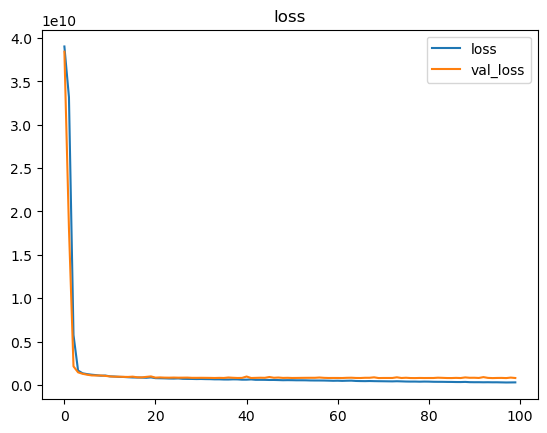

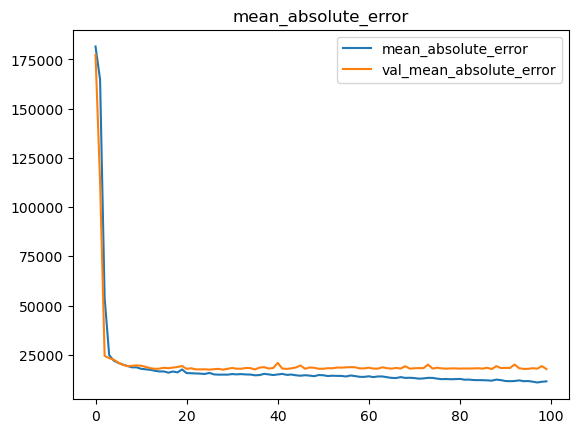

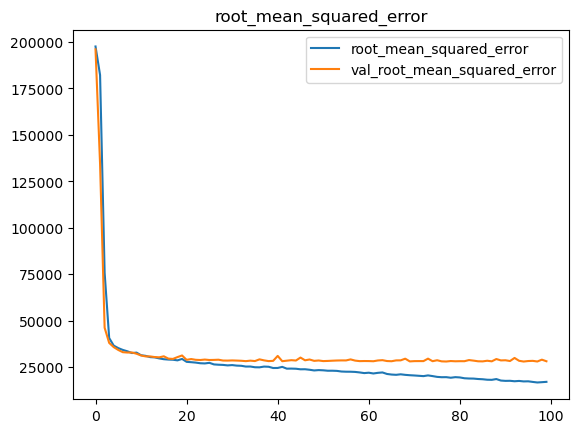

In [38]:
# plot learning history

plot_history(history)

In [42]:
# evaluate model
 
y_pred = model1.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


12/12 [==============================] - 0s 997us/step
final RMSE: 28241.893374382806
final MAE: 17764.966256421234
final R2: 0.8861428474588627


#### Iteration 2: Iteration 1 copy with regularization (dropout)

In [43]:
# create model architecture
input_features = X_train_proc.shape[1]

model2 = Sequential()

# first layer
model2.add(Dense(input_features, 
                 input_dim = input_features, 
                 activation = 'relu'))

# second layer
model2.add(Dense((input_features * 0.75),
                activation = 'relu'))

# third layer
model2.add(Dense((input_features * 0.5),
                activation = 'relu'))

# fourth layer
model2.add(Dense((input_features * 0.25),
                activation = 'relu'))

# dropout layer
model2.add(Dropout(0.2))

# output layer
model2.add(Dense(1, 
                 activation = 'linear'))

# check
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               90300     
                                                                 
 dense_11 (Dense)            (None, 225)               67725     
                                                                 
 dense_12 (Dense)            (None, 150)               33900     
                                                                 
 dense_13 (Dense)            (None, 75)                11325     
                                                                 
 dropout (Dropout)           (None, 75)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 76        
                                                                 
Total params: 203,326
Trainable params: 203,326
Non-tr

In [44]:
# compile model, add additional metrics

model2.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [45]:
# fit model and save learning history
history = model2.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs = 100,
                    verbose = 0)

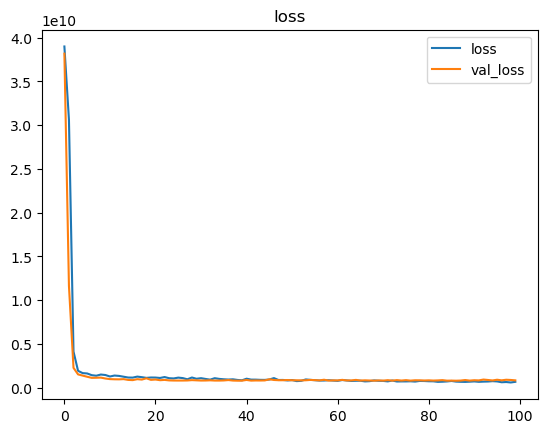

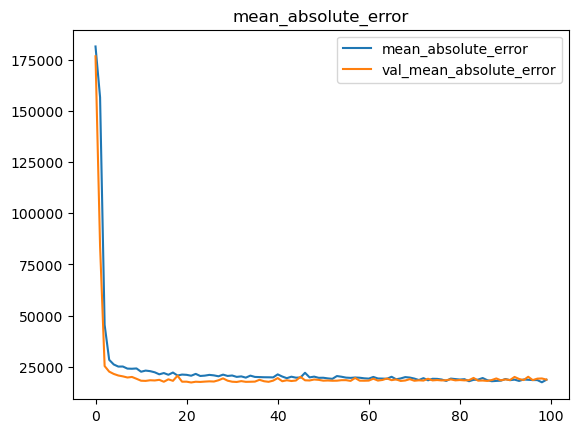

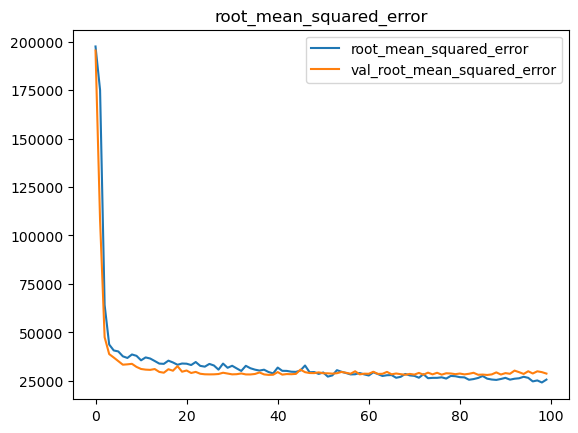

In [46]:
# plot learning history

plot_history(history)

In [47]:
# evaluate model
 
y_pred = model2.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


12/12 [==============================] - 0s 997us/step
final RMSE: 28787.86561496027
final MAE: 18724.11149400685
final R2: 0.8816981234556289


#### Iteration 3: 90->10 in 10s with dropout

In [59]:
# create model architecture
input_features = X_train_proc.shape[1]

model3 = Sequential()

# first layer
model3.add(Dense(input_features, 
                 input_dim = input_features, 
                 activation = 'relu'))

# second layer
model3.add(Dense((input_features * 0.9),
                activation = 'relu'))

# third layer
model3.add(Dense((input_features * 0.8),
                activation = 'relu'))

# fourth layer
model3.add(Dense((input_features * 0.7),
                activation = 'relu'))

# fifth layer
model3.add(Dense((input_features * 0.6),
                activation = 'relu'))

# sixth layer
model3.add(Dense((input_features * 0.5),
                activation = 'relu'))

# seventh layer
model3.add(Dense((input_features * 0.4),
                activation = 'relu'))
# eighth layer
model3.add(Dense((input_features * 0.3),
                activation = 'relu'))
# ninth layer
model3.add(Dense((input_features * 0.2),
                activation = 'relu'))
# tenth layer
model3.add(Dense((input_features * 0.1),
                activation = 'relu'))

# dropout layer
model3.add(Dropout(0.2))

# output layer
model3.add(Dense(1, 
                 activation = 'linear'))

# check
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 300)               90300     
                                                                 
 dense_27 (Dense)            (None, 270)               81270     
                                                                 
 dense_28 (Dense)            (None, 240)               65040     
                                                                 
 dense_29 (Dense)            (None, 210)               50610     
                                                                 
 dense_30 (Dense)            (None, 180)               37980     
                                                                 
 dense_31 (Dense)            (None, 150)               27150     
                                                                 
 dense_32 (Dense)            (None, 120)              

In [60]:
# compile model, add additional metrics

model3.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [61]:
# fit model and save learning history
history = model3.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs = 100,
                    verbose = 0)

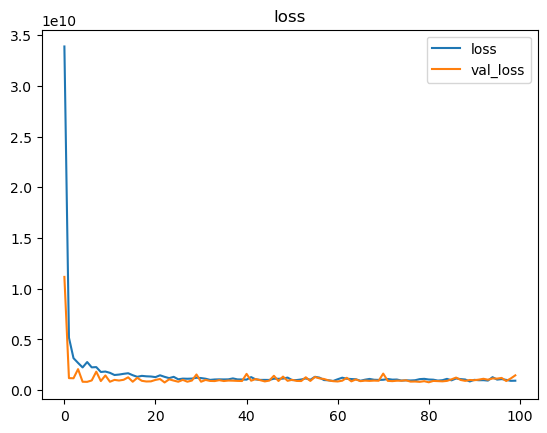

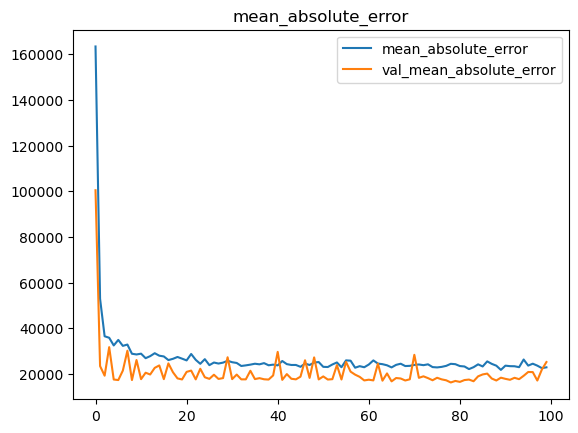

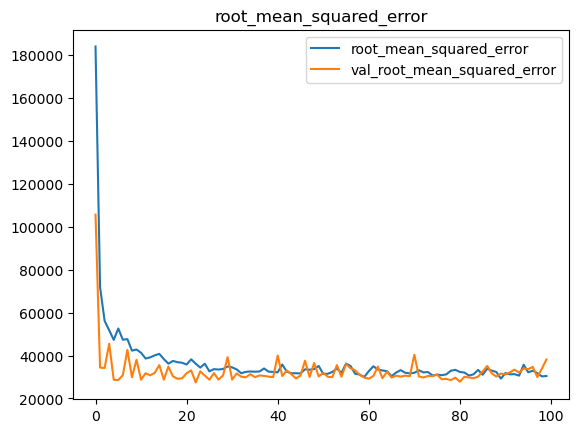

In [62]:
# plot learning history

plot_history(history)

In [63]:
# evaluate model
 
y_pred = model3.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


12/12 [==============================] - 0s 1ms/step
final RMSE: 38153.47552322224
final MAE: 25167.011954195204
final R2: 0.7922022164011433


### 3. Select your best model!

My best model was Model 1, which had 4 layers, and decreased neurons in every layer by 25% of the original number of features. The model did not include any regularization. The metrics for Model 1 were:

- final RMSE: 28241.893374382806
- final MAE: 17764.966256421234
- final R2: 0.8861428474588627